# Computational Synaesthesia Pipeline

This notebook will walk you through some of the analysis conducted in _Color Associations in Abstract Semantic Domains_ (Guilbeault et al, 2020). We will be using the built in functionality of comp-syn to do this, to go from data collecting to creating the word-color vectors, to performing analysis on these. 

### imports

In [1]:
from compsyn.config import CompsynConfig
from compsyn.trial import Trial
from compsyn.vectors import WordToColorVector

### Loading Data

Comp-syn uses image data to create its vectors and analysis. It has a built in function to download images off the internet, as well as use WordNet to find words in the same heirarchy. The `CompsynConfig`, `Trial` and `WordToColorVector` classes used here are discussed in more detail in the `configuration` and `trial_and_vector` notebooks.

In [2]:
COMPSYN_ROOT_DIR="/Volumes/LACIE/compsyn" # change to a path on your local system where you store compsyn files
config = CompsynConfig(
    work_dir=f"{COMPSYN_ROOT_DIR}/notebook_work_dir",
    jzazbz_array=f"{COMPSYN_ROOT_DIR}/jzazbz_array.npy",
    google_application_credentials=f"{COMPSYN_ROOT_DIR}/compsyn3-8cf6580619a9.json",
    driver_path="/usr/local/bin/geckodriver", # remove this if you used chromedriver
    driver_browser="Firefox", # remove this if you use Chrome
)

trial = Trial(
    experiment_name="color-associations-in-abstract-domains",
    trial_id="notebook-example",
    hostname="notebook-user"
)

[1616946885] (compsyn.Trial)  INFO: experiment: color-associations-in-abstract-domains
[1616946885] (compsyn.Trial)  INFO: trial_id: notebook-example
[1616946885] (compsyn.Trial)  INFO: hostname: notebook-user


In [3]:
vectors = dict()
for label in ["literature", "mathematics", "poetry", "dance", "physics", "drama", "atlantis"]:
    w2cv = WordToColorVector(label=label, trial=trial)
    w2cv.run_image_capture() # download images
    w2cv.run_analysis() # run main compsyn analysis
    vectors.update({label: w2cv})
    

[1616946885] (compsyn.WordToColorVector.literature)  INFO: 97 raw images already downloaded
[1616946889] (compsyn.ImageAnalysis)  INFO: literature is being compressed.
[1616946889] (compsyn.WordToColorVector.mathematics)  INFO: 96 raw images already downloaded
[1616946892] (compsyn.ImageAnalysis)  INFO: mathematics is being compressed.
[1616946892] (compsyn.WordToColorVector.poetry)  INFO: 96 raw images already downloaded
[1616946896] (compsyn.ImageAnalysis)  INFO: poetry is being compressed.
[1616946896] (compsyn.WordToColorVector.dance)  INFO: 97 raw images already downloaded
[1616946899] (compsyn.ImageAnalysis)  INFO: dance is being compressed.
[1616946899] (compsyn.WordToColorVector.physics)  INFO: 98 raw images already downloaded
[1616946902] (compsyn.ImageAnalysis)  WARNING: invalid value encountered in true_divide, skipping image 39/98
[1616946903] (compsyn.ImageAnalysis)  INFO: physics is being compressed.
[1616946903] (compsyn.WordToColorVector.drama)  INFO: 97 raw images alre

## Playing with Colors

Now that we have our images and the corresponding vectors in both RGB form and JzAzBz form, we can visualise these images. Let us start with a simple Colorgram (composite image).

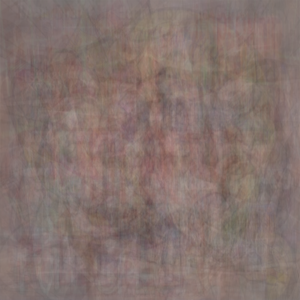

In [4]:
vectors["drama"].colorgram

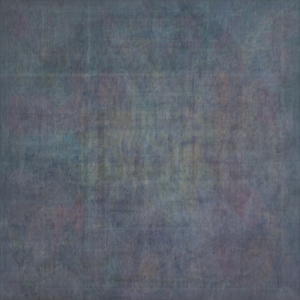

In [5]:
vectors["physics"].colorgram

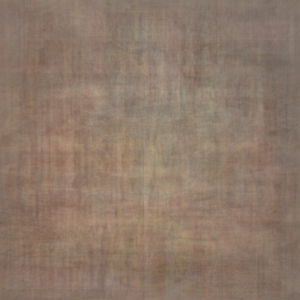

In [6]:
vectors["literature"].colorgram

To perform more advanced analysis of the categories and the relationships between them, we must combine analysis objects from each vector and calculate color distributions and entropys.

In [7]:
from compsyn.analysis import merge_vectors_to_image_analysis

image_analysis = merge_vectors_to_image_analysis([ vector for vector in vectors.values()])
image_analysis.compress_color_data()
image_analysis.entropy_computations()

[1616946910] (compsyn.merge_image_analysis)  INFO: merged ImageData from 7 WordToColorVector objects
[1616946915] (compsyn.ImageAnalysis)  WARNING: invalid value encountered in true_divide, skipping image 39/98
[1616946916] (compsyn.ImageAnalysis)  INFO: literature is being compressed.
[1616946916] (compsyn.ImageAnalysis)  INFO: mathematics is being compressed.
[1616946916] (compsyn.ImageAnalysis)  INFO: poetry is being compressed.
[1616946916] (compsyn.ImageAnalysis)  INFO: dance is being compressed.
[1616946916] (compsyn.ImageAnalysis)  INFO: physics is being compressed.
[1616946916] (compsyn.ImageAnalysis)  INFO: drama is being compressed.
[1616946916] (compsyn.ImageAnalysis)  INFO: atlantis is being compressed.
[1616946917] (compsyn.ImageAnalysis)  INFO: performing entropy calculations


The above sets up what we need for the visualisations.

### Visualisations

In [8]:
from compsyn.visualisation import Visualisation

viz = Visualisation(image_analysis)

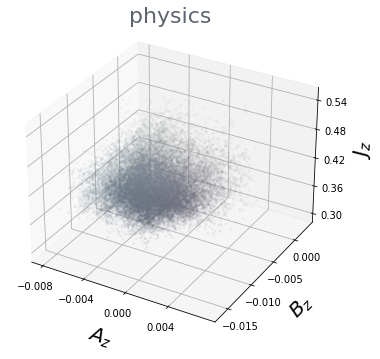

In [9]:
viz.jzazbz_color_distribution("physics")

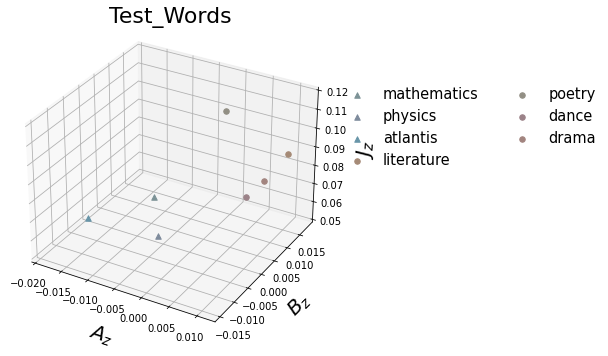

In [10]:
# complains about color value
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

viz.plot_labels_in_space()

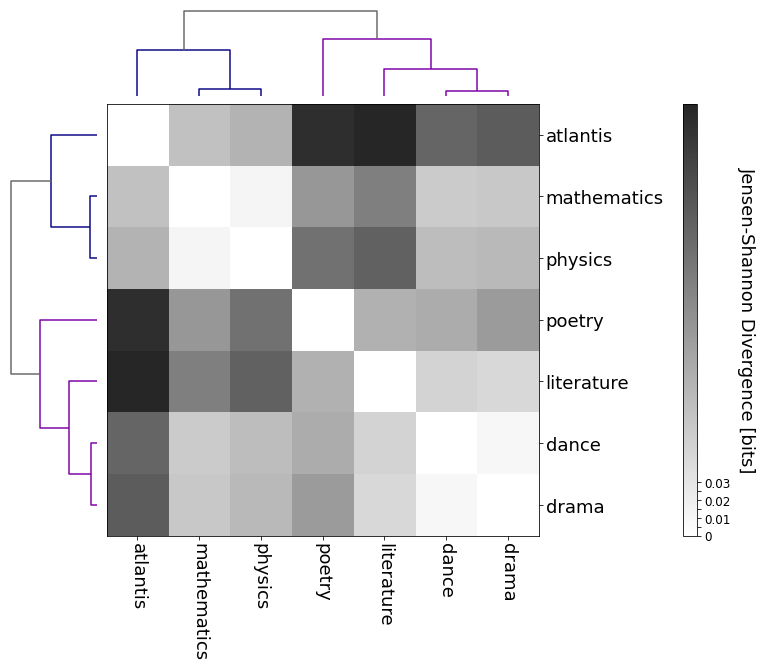

In [11]:
viz.cluster_analysis()

Exception ignored in: <finalize object at 0x16137e0d0; dead>
Traceback (most recent call last):
  File "/usr/local/opt/python@3.8/Frameworks/Python.framework/Versions/3.8/lib/python3.8/weakref.py", line 566, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/local/opt/python@3.8/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tempfile.py", line 819, in _cleanup
    _warnings.warn(warn_message, ResourceWarning)


TypeError: Cannot handle this data type: (1, 1, 3), <f8

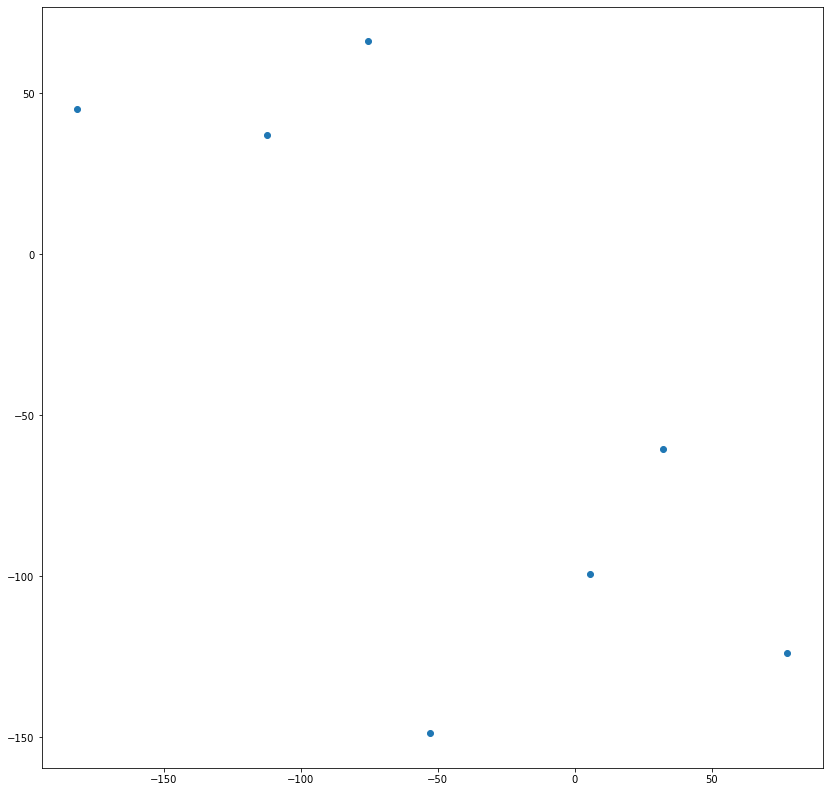

In [12]:
viz.plot_tsne()

In [ ]:
viz.plot_word_colors(word_distance=0.4, size=40)